## Exact Diagonalization (Concrete Implementation)

In [1]:
import numpy as np
from numpy import kron
from scipy.linalg import eigh

# Pauli matrices
I = np.eye(2)
sx = np.array([[0, 1], [1, 0]])
sz = np.array([[1, 0], [0, -1]])

def op_on_site(op, site, N):
    """Place single-qubit operator on site"""
    ops = [I]*N
    ops[site] = op
    result = ops[0]
    for o in ops[1:]:
        result = kron(result, o)
    return result

def two_site_op(op1, i, op2, j, N):
    ops = [I]*N
    ops[i] = op1
    ops[j] = op2
    result = ops[0]
    for o in ops[1:]:
        result = kron(result, o)
    return result

def tfim_hamiltonian(h, N=4):
    H = np.zeros((2**N, 2**N))

    # ZZ interaction
    for i in range(N-1):
        H -= two_site_op(sz, i, sz, i+1, N)

    # Transverse field
    for i in range(N):
        H -= h * op_on_site(sx, i, N)

    return H

In [2]:
# Computing Observables
hs = np.linspace(0, 2, 50)

E0, gap, Mz = [], [], []

N = 4

for h in hs:
    H = tfim_hamiltonian(h, N)
    evals, evecs = eigh(H)

    E0.append(evals[0])
    gap.append(evals[1] - evals[0])

    psi0 = evecs[:, 0]

    mz = 0
    for i in range(N):
        mz += psi0.conj().T @ op_on_site(sz, i, N) @ psi0
    Mz.append(np.real(mz) / N)

In [3]:
print("h    Ground Energy    Gap     Magnetization")
for i in range(0, len(hs), 10):
    print(f"{hs[i]:.2f}  {E0[i]:.4f}        {gap[i]:.4f}    {Mz[i]:.4f}")

h    Ground Energy    Gap     Magnetization
0.00  -3.0000        0.0000    1.0000
0.41  -3.2759        0.0464    -0.0000
0.82  -4.1926        0.4220    -0.0000
1.22  -5.5167        1.0706    -0.0000
1.63  -6.9931        1.8130    -0.0000


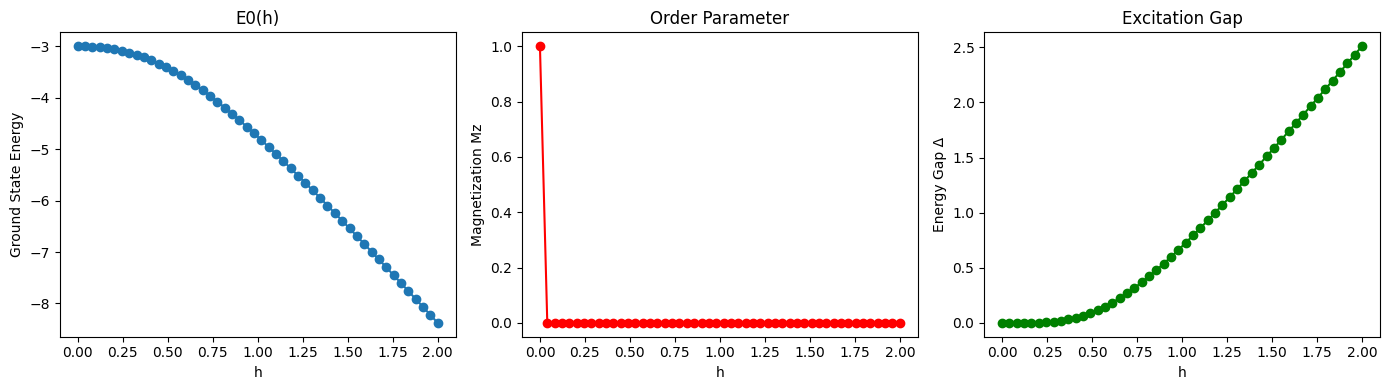

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,4))

# Ground state energy
plt.subplot(1,3,1)
plt.plot(hs, E0, 'o-')
plt.xlabel("h")
plt.ylabel("Ground State Energy")
plt.title("E0(h)")

# Magnetization
plt.subplot(1,3,2)
plt.plot(hs, Mz, 'o-', color='red')
plt.xlabel("h")
plt.ylabel("Magnetization Mz")
plt.title("Order Parameter")

# Energy gap
plt.subplot(1,3,3)
plt.plot(hs, gap, 'o-', color='green')
plt.xlabel("h")
plt.ylabel("Energy Gap Δ")
plt.title("Excitation Gap")

plt.tight_layout()
plt.show()